In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


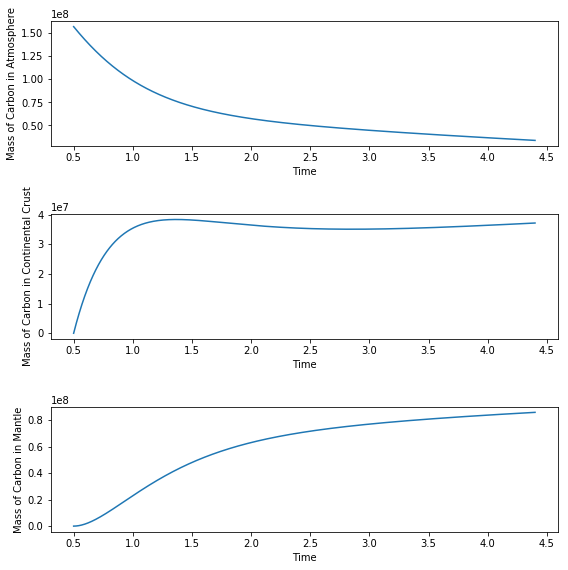

In [35]:
from scipy.integrate import odeint
#help(odeint)    # Uncomment to view the help file for this function

def f(y, t, params):
    cMa, cMcc, cMm = y
    tau, cMmp, cFmap, cMccp, cFccmp, tp, tf = params
    derivs = [(cMm/cMmp)*cFmap*exp((tp - t)/tf) - cMa/tau,
             cMa/tau - (cMcc/cMccp)*cFccmp*exp((tp - t)/tf),
             ((cMcc/cMccp)*cFccmp - (cMm/cMmp)*cFmap)*exp((tp-t)/tf)]
    return derivs

# Parameters
t0 = 0.5
tp = 4.4
tf = 3.61
ts = 1e3

tau = 1
cFmap = (36/1000)*1e9
cMmp = 1.15e8
cFccmp = (36/1000)*1e9
cMccp = 4.2e7

# Initial values
cMa0 = 1.57e8
cMcc0 = 0
cMm0 = 0

# Bundle parameters for ODE solver
params = [tau, cMmp, cFmap, cMccp, cFccmp, tp, tf]

# Bundle initial conditions for ODE solver
y0 = [cMa0, cMcc0, cMm0]

t = np.linspace(t0,tp,ts)
solution = odeint(f, y0, t, args=(params,))
fig = plt.figure(1, figsize=(8,8))

# Plot cMa as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, solution[:,0])
ax1.set_xlabel('Time')
ax1.set_ylabel('Mass of Carbon in Atmosphere')

# Plot cMcc as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, solution[:,1])
ax2.set_xlabel('Time')
ax2.set_ylabel('Mass of Carbon in Continental Crust')

# Plot cMm as a function of time
ax3 = fig.add_subplot(313)
ax3.plot(t, solution[:,2])
ax3.set_xlabel('Time')
ax3.set_ylabel('Mass of Carbon in Mantle')

plt.tight_layout()
plt.show()